In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
import glob
import matplotlib.image as mpimg
from PIL import Image
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [24]:
path = 'images/'

In [25]:
df = pd.read_csv('cadod.csv')
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

In [26]:
TRAIN_DIR = path 

In [34]:
BATCH_SIZE = 128
IMAGE_SHAPE = 128
def plot_images(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    for img, ax in zip(images, axes.flatten()):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()  

In [35]:
def show_augmentation(generator):
    image_data = image_generator.flow_from_directory(
        directory= TRAIN_DIR,
        target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
        batch_size=BATCH_SIZE,
        shuffle=True
    )
    augmented_images = [image_data[0][0][0] for _ in range(5)]
    plot_images(augmented_images)

## Horizontal flipping

Found 12966 images belonging to 1 classes.


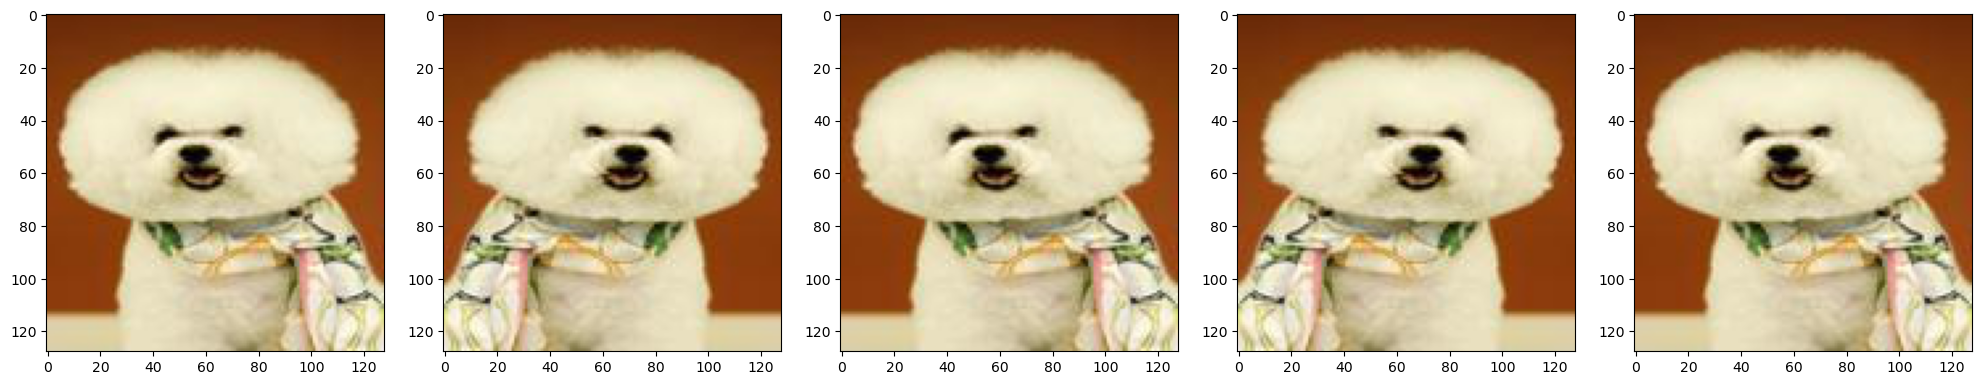

In [36]:
image_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
show_augmentation(image_generator)

## Rotation

Found 12966 images belonging to 1 classes.


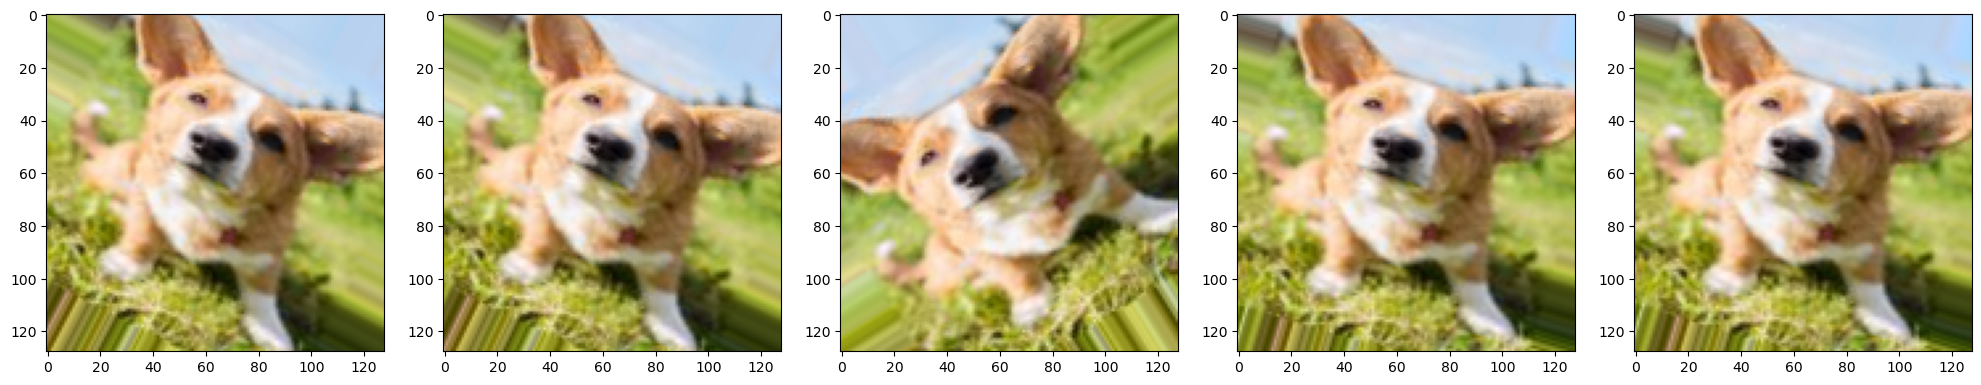

In [37]:
image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45)
show_augmentation(image_generator)

## Zoom

Found 12966 images belonging to 1 classes.


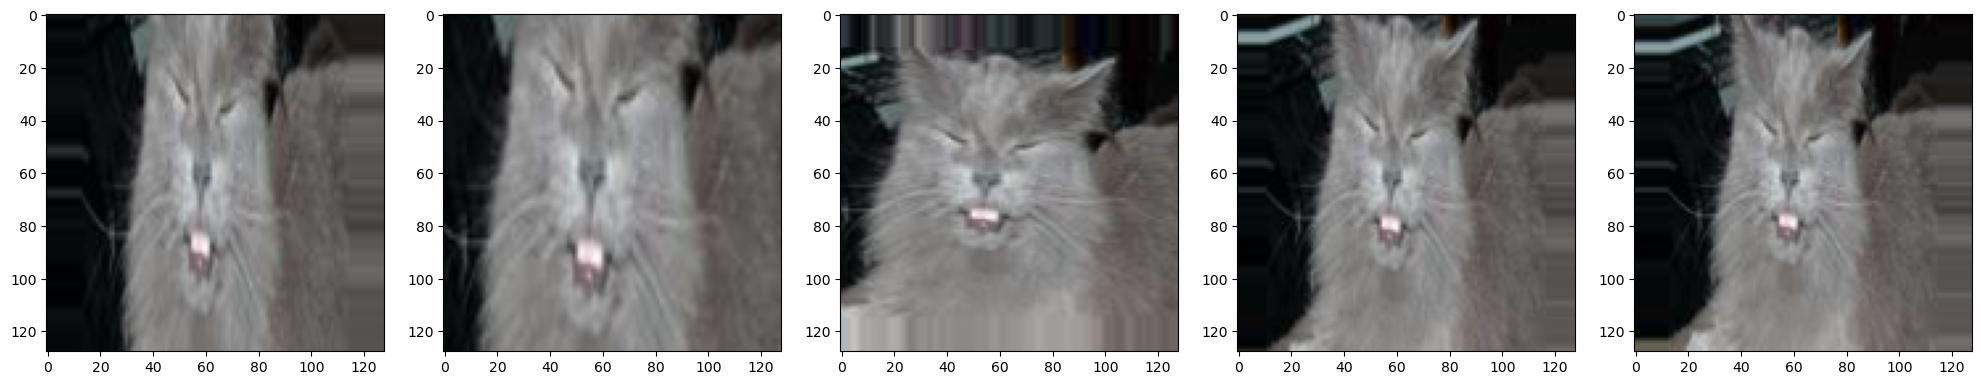

In [38]:
image_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
show_augmentation(image_generator)

Combining

Found 12966 images belonging to 1 classes.
Found 12966 images belonging to 1 classes.


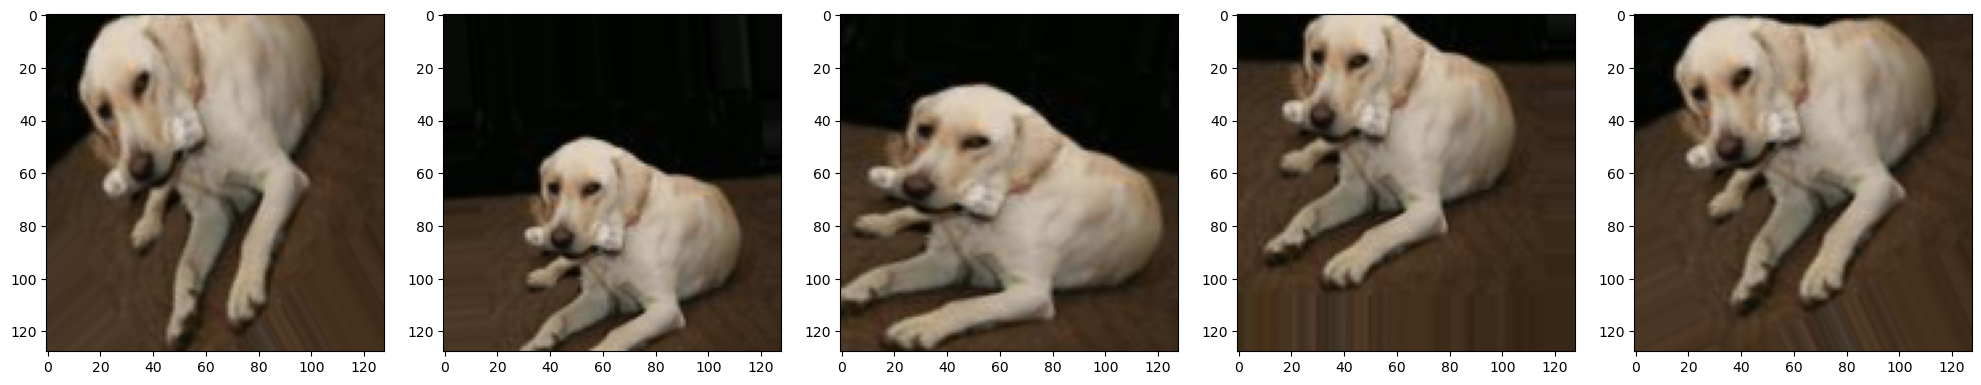

In [39]:
image_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
train_data = image_generator.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='binary'
)
show_augmentation(image_generator)